In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.tree import plot_tree

# Data 

In [4]:
# read data
df = pd.read_csv("heart.csv")
X = df.drop(columns='target')
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [5]:
print(X.shape)
X.head()

(303, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


# Random Forest

In [6]:
num_trees = 40 # forest size
col_subset_size = int(np.sqrt(df.columns.size)) # convention of sqrt(num_features)
sample_size = df.index.size # bootstrap = sample data of same size with replacement

forest = []
rand_sample = []

np.random.seed(0)
for i in range(num_trees):
    # select random features
    col_subset = np.random.choice(X_train.columns, size=col_subset_size, replace=False)
    # select random data with replacement
    sampled_idx = np.random.choice(X_train.index, size=sample_size, replace=True)
    
    # apply the random selection to data
    X_rand_sample = df.loc[sampled_idx, col_subset]
    y_rand_sample = df.loc[sampled_idx, 'target']
    
    # fit the random tree
    clf_rand = DecisionTreeClassifier(criterion = 'gini')
    clf_rand.fit(X_rand_sample, y_rand_sample)
    
    # save data and tree
    forest.append(clf_rand)
    rand_sample.append((X_rand_sample, y_rand_sample))

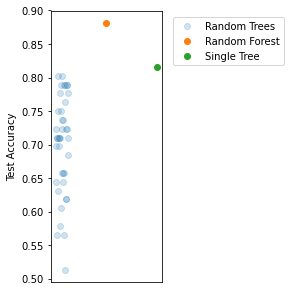

In [7]:
accs = [] # accuracies for all random trees
preds = [] # predictions for all random trees

for tree, (X_, y_) in zip(forest, rand_sample):
    # predict and score the random tree
    p = tree.predict(X_test[X_.columns])
    acc = accuracy_score(p, y_test)
    # save results
    accs.append(acc)
    preds.append(p)

# make the voting scores
preds = np.array(preds)
voting_preds = stats.mode(preds)[0][0] # the mode is the most popular prediction per sample (שכיח)
rf_acc = accuracy_score(voting_preds, y_test)

# train a single tree over the data
single_tree_preds = DecisionTreeClassifier(criterion = 'gini', random_state=0).fit(X_train, y_train).predict(X_test)
single_acc = accuracy_score(single_tree_preds, y_test)

plt.figure(figsize=(2,5))
plt.scatter(np.linspace(0,0.25,40), accs, label="Random Trees", alpha=0.2)
plt.scatter([1], [rf_acc], label="Random Forest")
plt.scatter([2], [single_acc], label="Single Tree")
plt.legend(loc=(1.1,0.8))
plt.ylabel("Test Accuracy")
plt.xticks([])
plt.show()


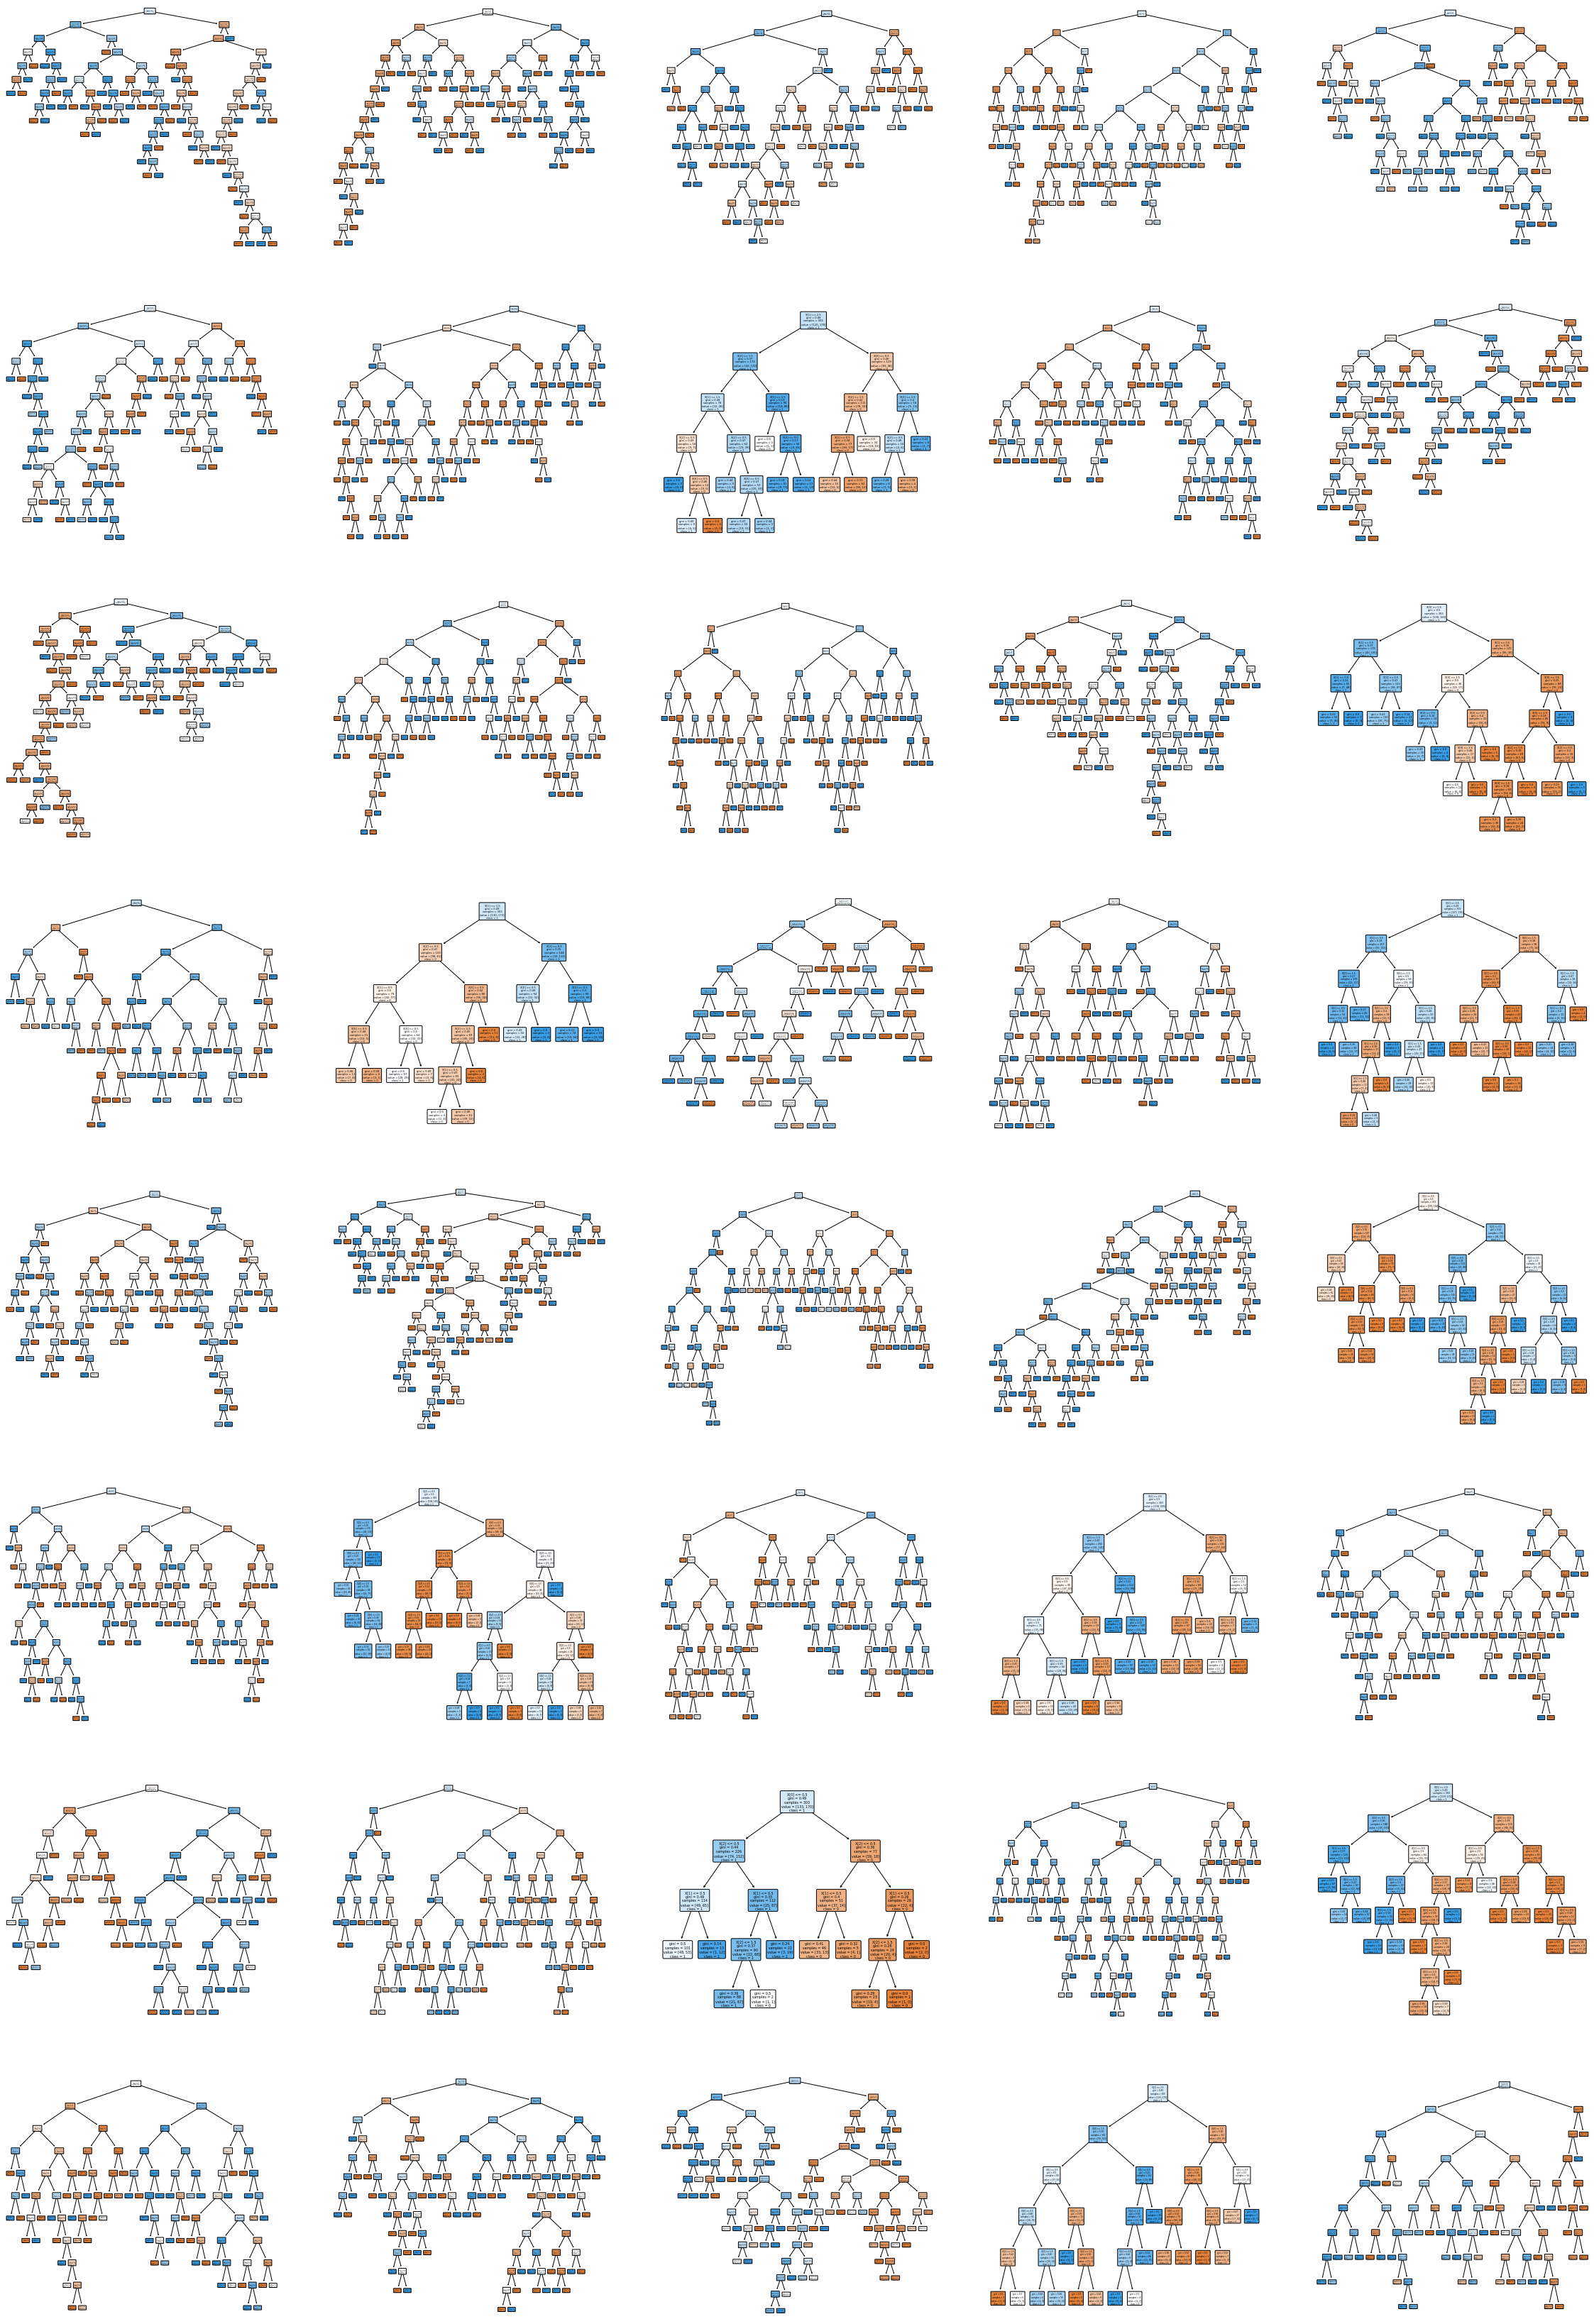

In [8]:
fig, axes = plt.subplots(8,5, figsize=(40,60))
for tree, ax in zip(forest, axes.ravel()):
    dot_data  = plot_tree(tree,
                        class_names = ["0","1"],
                        rounded = True, proportion = False, impurity = True,
                        label='all', precision = 2, filled = True, ax=ax)

In [9]:
rf = RandomForestClassifier(n_estimators=40, random_state=0)
rf.fit(X_train, y_train)
print("Sklearn Random Forest acc:", rf.score(X_test, y_test))
print("Our Random Forest acc:", rf_acc)

Sklearn Random Forest acc: 0.8947368421052632
Our Random Forest acc: 0.881578947368421


In [10]:
rf = RandomForestClassifier(n_estimators=40, random_state=0)